## Table Of Contents
<font size=3rem>
    
0 -**[ INTRO](#INTRODUCTION)<br>**
1 -**[ OBTAIN](#OBTAIN)**<br>
2 -**[ PREPROCESSING](#PREPROCESSING)**<br>
4 -**[ MODEL](#MODEL)**<br>
5 -**[ INTERPRET](#INTERPRET)**<br>
6 -**[ CONCLUSIONS & RECCOMENDATIONS](#Conclusions-&-Recommendations)<br>**
</font>
___

# INTRODUCTION

- Student: Cody Freese
- Pace: Self Paced
- Jeff Herman

- Pneumonia Chest Xray Image Classification
    - Objective
        - First I need to decide on:
            - Accuracy
            - Precision
            - Recall
            - F1 Score
        - Priority
            - (1) Do not want to tell a sick person they are healthy
            
            - (2) Accurately identify pneumonia
            - (3) Tell healthy person they are sick

## Import Tools

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
import cv2

Using TensorFlow backend.


## FUNCTIONS

In [1]:
def get_num_pixels(pixel_path):
    '''
    Gets width and height of image
    :param pixel_path: Pathway
    :return width, height
    '''
    
    width, height = Image.open(pixel_path).size
    return width, height

In [2]:
def get_image_pixels_and_paths(path):
    '''
    Joins the classes of called picture pixel count for total of called class
    :param path:
    :return None: prints out pixel dimensions
    '''
    
    # Print width/height for each image in Normal Test Path
    for path, subdirs, files in os.walk(path):
        for name in files:
            image_path = os.path.join(path,name)
            print(get_num_pixels(image_path))

# OBTAIN

In [12]:
#Home Directory
home_path = r'C:\Users\c_fre\Learn.co\Module_4_Project\Image-Classification\chest_xray'

#Train Directory
train_path = os.path.join(home_path,'train')

#Validation Directory
val_path = os.path.join(home_path,'val')

#Test Directory
test_path = os.path.join(home_path,'test')

#Train Subdirectories
normal_train_path = os.path.join(train_path,'NORMAL')

pneumonia_train_path = os.path.join(train_path,'PNEUMONIA')

#Validation Subdirectories
normal_val_path = os.path.join(val_path,'NORMAL')

pneumonia_val_path = os.path.join(val_path,'PNEUMONIA')

#Test Subdirectories

normal_test_path = os.path.join(test_path,'NORMAL')

pneumonia_test_path = os.path.join(test_path,'PNEUMONIA')

In [13]:
#Observe Contents
print('Directory Contents:',os.listdir(home_path))
print('train Contents:',os.listdir(train_path))
print('val Contents:',os.listdir(val_path))
print('test Contents:',os.listdir(test_path))

Directory Contents: ['test', 'train', 'val']
train Contents: ['NORMAL', 'PNEUMONIA']
val Contents: ['NORMAL', 'PNEUMONIA']
test Contents: ['NORMAL', 'PNEUMONIA']


In [14]:
#Cases in Training Sets
print("Number of cases in Training:",len(os.listdir(normal_train_path)) +len(os.listdir(pneumonia_train_path)))

print("Number of Pneumonia cases in Training:",len(os.listdir(pneumonia_train_path)))

print("Number of Normal cases in Training:",len(os.listdir(normal_train_path)))

Number of cases in Training: 5216
Number of Pneumonia cases in Training: 3875
Number of Normal cases in Training: 1341


In [15]:
# Cases in Validation Sets
print("Number of cases in Validation:",len(os.listdir(normal_val_path)) +len(os.listdir(pneumonia_val_path)))

print("Number of Pneumonia cases in Validation:",len(os.listdir(pneumonia_val_path)))

print("Number of Normal cases in Validation:",len(os.listdir(normal_val_path)))

Number of cases in Validation: 16
Number of Pneumonia cases in Validation: 8
Number of Normal cases in Validation: 8


In [16]:
#Cases in Test Sets
print("Number of cases in Test:",len(os.listdir(normal_test_path)) +len(os.listdir(pneumonia_test_path)))

print("Number of Pneumonia cases in Test:",len(os.listdir(pneumonia_test_path)))

print("Number of Normal cases in Test:",len(os.listdir(normal_test_path)))

Number of cases in Test: 624
Number of Pneumonia cases in Test: 390
Number of Normal cases in Test: 234


In [17]:
# #Total number of Normal Cases
print("Total number of Normal cases:",
      len(os.listdir(normal_test_path))+
      len(os.listdir(normal_train_path))+
      len(os.listdir(normal_val_path)))

#Total number of Pneumonia Cases
print("Total number of Pneumonia cases:",
      len(os.listdir(pneumonia_test_path))+
      len(os.listdir(pneumonia_train_path))+
      len(os.listdir(pneumonia_val_path)))

Total number of Normal cases: 1583
Total number of Pneumonia cases: 4273


In [18]:
get_image_pixels_and_paths(test_path)
get_image_pixels_and_paths(train_path)
get_image_pixels_and_paths(val_path)

(1857, 1317)
(2111, 1509)
(2031, 1837)
(1663, 1326)
(2053, 1818)
(1852, 1443)
(1873, 1478)
(2144, 1916)
(2214, 1945)
(1863, 1785)
(2444, 2155)
(1803, 1238)
(2498, 2057)
(1984, 1559)
(1917, 1432)
(2624, 1893)
(1300, 617)
(2022, 1384)
(2720, 2458)
(2271, 1827)
(2522, 2124)
(2343, 2139)
(1647, 1314)
(1949, 1632)
(2170, 1953)
(2024, 1836)
(1658, 1534)
(2480, 2329)
(2096, 1709)
(1741, 1504)
(2153, 1793)
(2022, 2071)
(2297, 2032)
(2746, 2382)
(2001, 1725)
(1762, 1060)
(2752, 1882)
(1616, 1041)
(1754, 1318)
(2034, 1761)
(1562, 1021)
(1572, 1125)
(1974, 1226)
(2034, 1392)
(2060, 1558)
(1322, 650)
(1786, 1068)
(1740, 1246)
(1774, 1230)
(1260, 767)
(1240, 925)
(1754, 1187)
(1558, 1014)
(2006, 1461)
(1890, 1357)
(2426, 2076)
(1754, 1036)
(1788, 1282)
(1866, 1311)
(1558, 925)
(1862, 1326)
(1460, 906)
(1472, 863)
(1970, 2085)
(2022, 1299)
(1824, 1125)
(1802, 1110)
(1542, 871)
(1910, 1303)
(2165, 1907)
(1784, 1440)
(2165, 1749)
(2043, 2087)
(2071, 1296)
(1856, 1418)
(2381, 1965)
(1928, 1756)
(2517, 

(1724, 1480)
(1608, 1228)
(2396, 1990)
(1550, 1368)
(1812, 1206)
(1720, 1306)
(1512, 1171)
(1562, 1086)
(1682, 1418)
(1596, 1330)
(1690, 1538)
(1810, 1545)
(1616, 1109)
(1848, 1495)
(1620, 1356)
(2002, 1786)
(1346, 1109)
(1582, 1155)
(1522, 1093)
(1704, 1449)
(1866, 1595)
(1828, 1654)
(1608, 1345)
(1766, 1503)
(1616, 1121)
(1728, 1222)
(1588, 1372)
(1936, 1612)
(1426, 1101)
(1982, 1804)
(1438, 1140)
(2280, 2066)
(1708, 1434)
(1518, 1005)
(1858, 1500)
(1438, 1059)
(1700, 1383)
(1828, 1511)
(1708, 1415)
(1704, 1487)
(1800, 1503)
(2020, 1565)
(1708, 1267)
(1430, 1128)
(1762, 1264)
(1472, 978)
(1304, 1097)
(1380, 1040)
(1766, 1557)
(1654, 1368)
(2144, 1805)
(1268, 885)
(1508, 1093)
(1696, 1298)
(1014, 846)
(1268, 959)
(1368, 1009)
(2106, 1719)
(1634, 1210)
(1292, 1225)
(1700, 1271)
(1824, 1430)
(1198, 931)
(1504, 1174)
(1520, 1306)
(1808, 1507)
(1196, 974)
(1422, 1191)
(1360, 1341)
(1512, 1202)
(1114, 843)
(2538, 1897)
(1584, 1237)
(1746, 1392)
(1792, 1623)
(1840, 1480)
(1654, 1364)
(1588,

(1862, 1441)
(1716, 1225)
(1836, 1592)
(1464, 1205)
(1754, 1499)
(1692, 1360)
(2078, 2067)
(1306, 1047)
(1746, 1576)
(1616, 1187)
(1882, 1418)
(1350, 1090)
(1898, 1804)
(1608, 1348)
(2040, 2059)
(1828, 1781)
(1636, 1218)
(1898, 1565)
(1376, 1105)
(1592, 1392)
(1558, 1167)
(1692, 1245)
(1434, 978)
(1392, 1232)
(1982, 1751)
(2566, 1909)
(1596, 1510)
(1500, 1206)
(1364, 1148)
(1716, 1530)
(1786, 1360)
(1676, 1129)
(1902, 1608)
(1172, 986)
(1306, 994)
(1414, 1167)
(1302, 927)
(2114, 1681)
(1886, 1573)
(1762, 1341)
(1570, 1460)
(1056, 792)
(1354, 1078)
(2024, 1963)
(1362, 1093)
(1422, 1402)
(1316, 1067)
(1416, 992)
(1873, 1764)
(1522, 1090)
(1828, 1515)
(1720, 1465)
(2916, 2583)
(2048, 1882)
(1654, 1446)
(2482, 2570)
(1854, 1495)
(1682, 1380)
(1392, 1148)
(1206, 978)
(1654, 1171)
(1562, 1156)
(1686, 1337)
(1920, 1708)
(1902, 1499)
(1372, 1047)
(1464, 1164)
(1246, 951)
(2414, 1731)
(1738, 1296)
(1484, 993)
(1322, 1125)
(1740, 1735)
(1990, 1666)
(1514, 1152)
(1742, 1422)
(1724, 1248)
(1570, 1

(928, 480)
(1128, 720)
(840, 528)
(816, 368)
(1176, 856)
(1000, 744)
(1144, 720)
(1168, 1024)
(1256, 864)
(1208, 984)
(1328, 1040)
(1304, 864)
(1416, 1432)
(1208, 952)
(1280, 920)
(1422, 971)
(1320, 1240)
(1164, 836)
(1264, 832)
(960, 616)
(920, 560)
(1376, 1080)
(1248, 1152)
(1304, 816)
(1096, 600)
(952, 664)
(1128, 568)
(856, 608)
(824, 529)
(1320, 960)
(1132, 766)
(1368, 1044)
(1176, 727)
(1560, 1256)
(1008, 808)
(1096, 960)
(1408, 784)
(1434, 986)
(1408, 800)
(944, 552)
(1072, 504)
(1048, 776)
(635, 448)
(1384, 1184)
(1184, 664)
(1304, 880)
(1120, 736)
(1312, 960)
(1272, 1075)
(1392, 1264)
(1392, 1056)
(1264, 760)
(1032, 536)
(1216, 936)
(1320, 984)
(840, 536)
(1336, 784)
(1216, 800)
(1168, 648)
(1296, 1120)
(1592, 1056)
(984, 608)
(984, 584)
(1288, 880)
(714, 503)
(1646, 1310)
(1264, 1152)
(1736, 1365)
(1512, 1488)
(1400, 1024)
(984, 712)
(1056, 624)
(671, 393)
(1424, 1112)
(1544, 1008)
(1144, 600)
(1096, 536)
(1064, 760)
(1056, 688)
(1120, 568)
(1136, 528)
(1160, 664)
(1328, 936)

(1528, 1376)
(1400, 1104)
(1264, 800)
(1352, 928)
(1296, 848)
(1304, 712)
(1096, 600)
(1360, 888)
(1264, 984)
(1280, 1016)
(1440, 992)
(1528, 1080)
(1416, 1056)
(1296, 944)
(1536, 1176)
(1384, 1088)
(968, 440)
(1392, 712)
(936, 632)
(1768, 1216)
(1616, 1024)
(1024, 592)
(1144, 656)
(1304, 1024)
(1248, 1064)
(1144, 736)
(1240, 696)
(1352, 864)
(1496, 1024)
(1120, 640)
(1064, 656)
(1192, 696)
(1336, 808)
(1128, 752)
(1376, 832)
(1136, 712)
(1032, 840)
(1168, 800)
(1552, 1176)
(1960, 1992)
(2000, 1896)
(1984, 1840)
(1280, 856)
(1160, 664)
(1720, 1240)
(952, 736)
(1056, 760)
(1176, 760)
(1240, 848)
(1272, 776)
(1416, 800)
(1336, 832)
(1696, 1224)
(1768, 1488)
(1856, 1536)
(1824, 1776)
(1664, 1456)
(1544, 1336)
(1632, 1144)
(1736, 1368)
(1768, 1560)
(1288, 824)
(1264, 920)
(1208, 808)
(1624, 864)
(1520, 1152)
(1136, 888)
(1112, 832)
(1280, 751)
(1848, 1488)
(1296, 832)
(1256, 840)
(1400, 880)
(1568, 992)
(1216, 880)
(1616, 1232)
(1016, 656)
(1136, 888)
(1064, 624)
(1056, 568)
(1168, 640)
(1

(446, 132)
(438, 190)
(529, 207)
(1336, 1064)
(1272, 1040)
(1384, 912)
(1336, 1024)
(1272, 912)
(1408, 904)
(1568, 896)
(500, 244)
(1488, 1168)
(1560, 952)
(1672, 1064)
(1472, 816)
(1304, 936)
(1592, 1056)
(1176, 736)
(1360, 1261)
(1208, 944)
(1184, 984)
(1080, 840)
(1200, 944)
(1289, 1253)
(1472, 976)
(880, 440)
(1648, 1592)
(1808, 1448)
(1104, 824)
(1096, 720)
(1040, 856)
(1016, 640)
(1168, 768)
(1152, 632)
(1184, 752)
(976, 664)
(984, 664)
(1008, 704)
(904, 576)
(1040, 656)
(1092, 751)
(1086, 693)
(896, 504)
(1578, 1318)
(1504, 1180)
(1424, 1024)
(920, 528)
(920, 680)
(888, 576)
(918, 735)
(550, 279)
(1344, 1128)
(952, 720)
(968, 752)
(920, 808)
(1144, 784)
(1008, 728)
(1072, 728)
(1000, 712)
(976, 616)
(976, 608)
(944, 744)
(856, 592)
(824, 616)
(888, 656)
(824, 640)
(824, 688)
(856, 616)
(1240, 968)
(1240, 752)
(445, 232)
(1016, 768)
(1024, 632)
(947, 594)
(1320, 1040)
(1202, 743)
(1128, 744)
(1032, 600)
(1072, 608)
(1268, 883)
(1328, 968)
(1760, 1432)
(831, 529)
(1304, 1048)
(439

(952, 568)
(1304, 832)
(1360, 1024)
(942, 537)
(1416, 1072)
(1072, 648)
(827, 463)
(976, 624)
(928, 688)
(1218, 789)
(1072, 576)
(817, 531)
(1176, 800)
(1346, 902)
(1104, 656)
(841, 521)
(1168, 816)
(976, 648)
(936, 744)
(1098, 759)
(1296, 816)
(1400, 840)
(1494, 1044)
(848, 616)
(1010, 676)
(1320, 936)
(920, 744)
(880, 632)
(888, 712)
(1248, 776)
(976, 640)
(984, 680)
(968, 648)
(1144, 936)
(1312, 776)
(931, 586)
(1048, 608)
(976, 600)
(1200, 752)
(1322, 1037)
(1160, 752)
(1024, 872)
(1152, 688)
(984, 656)
(1944, 1555)
(1840, 1350)
(1368, 912)
(1112, 784)
(1232, 1000)
(1104, 776)
(1176, 760)
(896, 578)
(1084, 618)
(1104, 888)
(1296, 896)
(1216, 1000)
(1248, 904)
(1128, 776)
(1200, 872)
(1112, 744)
(1186, 751)
(904, 464)
(845, 556)
(984, 664)
(896, 512)
(1292, 936)
(1016, 848)
(1112, 872)
(1122, 832)
(1136, 888)
(1088, 736)
(1292, 1014)
(1680, 1352)
(1184, 760)
(1120, 744)
(1344, 856)
(771, 447)
(1232, 680)
(920, 736)
(1056, 616)
(1088, 584)
(1024, 696)
(768, 424)
(1172, 732)
(1608, 11

(1376, 792)
(1264, 704)
(1152, 672)
(1432, 1000)
(1168, 1000)
(944, 568)
(920, 520)
(1208, 776)
(824, 584)
(904, 672)
(1432, 944)
(1072, 744)
(1288, 944)
(1000, 664)
(1096, 536)
(992, 832)
(1336, 1056)
(1000, 664)
(1456, 1072)
(1272, 936)
(904, 536)
(1608, 1096)
(1104, 832)
(1672, 1184)
(984, 656)
(992, 616)
(1758, 1249)
(1032, 640)
(1448, 856)
(1156, 747)
(1528, 840)
(1008, 696)
(912, 552)
(1016, 744)
(928, 584)
(1096, 672)
(1056, 664)
(1216, 672)
(1692, 1295)
(1216, 744)
(1636, 1130)
(1024, 664)
(1416, 912)
(1048, 544)
(1168, 760)
(1000, 568)
(1008, 584)
(1104, 592)
(1306, 762)
(1256, 824)
(1256, 720)
(1372, 817)
(1656, 1368)
(942, 571)
(527, 219)
(1392, 832)
(856, 536)
(1328, 976)
(1472, 1176)
(1432, 1176)
(1520, 1176)
(1512, 1008)
(1344, 1216)
(1016, 608)
(1768, 1072)
(1048, 632)
(1080, 784)
(1000, 560)
(747, 464)
(1368, 928)
(1000, 744)
(1608, 1104)
(952, 696)
(1000, 624)
(1008, 704)
(912, 520)
(1384, 944)
(1456, 912)
(1508, 1133)
(1790, 1326)
(1208, 720)
(1272, 792)
(1160, 800)
(

In [19]:
# Validation Pixel Size
get_image_pixels_and_paths(val_path)

(1776, 1416)
(1272, 1040)
(1736, 1416)
(1288, 928)
(1240, 1104)
(1328, 1104)
(1632, 1225)
(1564, 1302)
(968, 592)
(1072, 712)
(1152, 664)
(1416, 944)
(1256, 864)
(1016, 656)
(1192, 952)
(1664, 1128)


- Average of Validation images
- (1348,1003)
- 6 images losing width data
- 8 images losing height data

# PREPROCESSING

In [12]:
#Dataset for model
train_dataset = keras.preprocessing.image_dataset_from_directory(train_path,
                                                                labels='inferred',
                                                                label_mode='binary')

val_dataset = keras.preprocessing.image_dataset_from_directory(val_path,
                                                               labels='inferred',
                                                               label_mode='binary')

test_dataset = keras.preprocessing.image_dataset_from_directory(test_path,
                                                               labels='inferred',
                                                               label_mode='binary')

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [13]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

<BatchDataset shapes: ((None, 256, 256, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 1)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 256, 256, 3), (None, 1)), types: (tf.float32, tf.float32)>


In [14]:
# All below attempted to fit from ImageDataGenerator. Find way to make above fit with below

In [20]:
# Mini-Batch Gradient Descent
batch_size = 32
img_size = (1000,800)
batch_size = 10

In [21]:
# Train Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1./255, # transform pixeles from range 0-255 to range 0-1
                                   zoom_range = 0.3,
                                   vertical_flip = True)

training_set = train_datagen.flow_from_directory(directory = home_path + '/'+'train',
                                                 batch_size = batch_size,
                                                 target_size = (img_size, img_size),
                                                 shuffle = True,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [33]:
# Validation Image Data Generator

val_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range = 0.3,
                                 vertical_flip = True)

val_set = val_datagen.flow_from_directory(directory = home_path + '/'+'val',
                                            batch_size = batch_size,
                                            target_size = (img_size, img_size),
                                            shuffle = True,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [22]:
# Test Image Data Generator

test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range = 0.3,
                                 vertical_flip = True)

test_set = test_datagen.flow_from_directory(directory = home_path + '/'+'test',
                                            batch_size = batch_size,
                                            target_size = (img_size, img_size),
                                            shuffle = True,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


# EXPLORE

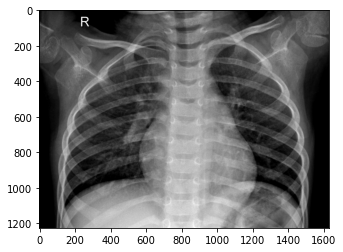

In [23]:
# Test Image
img_path = 'C:/Users/c_fre/Learn.co/Module_4_Project/Image-Classification/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg'

image = cv2.imread(img_path)

plt.imshow(image)

# MODELING

In [24]:
train_path = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0)

test_path = ImageDataGenerator(rescale=1 / 255.0)

In [30]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=7539541
)
valid_generator = valid_datagen.flow_from_directory(
    directory=val_path,
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    subset='validation',
    shuffle=True,
    seed=7539541
)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(255, 255),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=7539541
)

TypeError: listdir: path should be string, bytes, os.PathLike or None, not ImageDataGenerator

In [31]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [32]:
model = prepare_model()
model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5)

AttributeError: module 'keras.backend' has no attribute 'unique_object_name'

In [ ]:
model = Sequential()

In [ ]:
# 1st conv
model.add(Conv2D(filters = 16, kernel_size = (3, 3), input_shape = (img_size, img_size, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

In [ ]:
# 2nd conv
model.add(SeparableConv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))

In [ ]:
# 3rd conv
model.add(SeparableConv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

In [ ]:
# 4th conv
model.add(SeparableConv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

In [ ]:
# 5th
model.add(SeparableConv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(SeparableConv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

In [ ]:
# Connected layer
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.7))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.3))

In [ ]:
# Output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
#Model Summary
model.summary()


In [ ]:
# Sequntial Compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Callback
checkpoint = ModelCheckpoint(filepath = 'Pneumonia.h5', save_best_only = True, save_weights_only = True)
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, verbose = 2, mode = 'max')
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.1, patience = 1, mode = 'min')

In [ ]:
# Fit data to cnn model
cnn = model.fit_generator(training_set,
                          epochs = epochs,
                          steps_per_epoch = training_set.samples // batch_size,
                          validation_data = test_set,
                          validation_steps = test_set.samples // batch_size,
                          callbacks = [checkpoint, lr_reduce])   

In [ ]:
# model.load_weights('./Pneumonia.h5')

In [ ]:
#Input Test
rand_img = np.random.randint(0, len(os.listdir(val_dataset +'/'+ 'val/PNEUMONIA/')))
rand_img_path = val_dataset + '/'+'val/PNEUMONIA/' + os.listdir(val_dataset +'/'+ 'val/PNEUMONIA/')[rand_img]

img = plt.imread(rand_img_path)
img = cv2.resize(img, (img_size, img_size))
img = np.dstack([img, img, img])
img = img.astype('float32') / 255
result = model.predict(np.expand_dims(image.img_to_array(img), axis = 0))  

if result[0][0] >0.5:
  prediction = 'Pnuemonia'
else:
  prediction = 'Normal'
  
print(f'Predicted : ' + prediction)
print ('Actual : Pnuemonia')

image = plt.imread(rand_img_path)
plt.imshow(image)
plt.title('Pneumonia')
plt.imshow(image, cmap = 'gray')

In [ ]:
# Metrics
tn, fp, fn, tp = mat.ravel()
print('Test Metrics:')
precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

In [ ]:
print('Train Metric:')
print('Train accuracy: {}%'.format(np.round(cnn.history['accuracy'][-1]*100, 2)))